In [ ]:
# 2024-01
# Pareto frontier of compression algorithms

In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [8]:
with open('./ltcb.txt') as f:
    lines = f.readlines()

In [9]:
def get_substrings(text):
    substrings = []
    start = 0
    for i in range(len(text)):
        if text[i] in ' ~':
            if i > start:
                substrings.append((start, i, text[start:i]))
            start = i+1
    if start < len(text):
        substrings.append((start, len(text), text[start:]))
    return substrings

text = "foo   bar"
print(get_substrings(text))

[(0, 3, 'foo'), (6, 9, 'bar')]


In [10]:
names = []
xs = []
ys = []
for line in lines:
    subs = get_substrings(line)
    dtime = [s for i,j,s in subs if i <= 107 < j]
    size = [s for i,j,s in subs if i <= 60 < j]
    if not dtime or not size:
        print(line)
    elif (len(dtime), len(size)) != (1, 1):
        raise ValueError
    else:
        names.append(subs[0][2])
        xs.append(int(size[0].replace(',','')))
        ys.append(float(dtime[0]))

cmve 0.2.0        -m2,3,0x7fed7dfd            16,424,248  129,876,858    307,787 x  130,184,645 1140801       19963 CM  81

WinRK 3.03        pwcm +td 800MB SFX          18,612,453  156,291,924     99,665 xd 156,391,589  68555        800 CM   10

bwtdisk 0.9.0     -b 2 -m 3500                24,725,277  190,004,306    169,579 s  190,173,885   1124       3500 BWT  48

TarsaLZP Jan 29 2012                          24,751,389  208,867,187     13,081 s  208,880,268    203      ~2000 LZP  54



In [20]:
pareto = []
pairs = [*zip(xs, ys, names)]
keepnames = ['gzip', 'bzip2', 'xz', 'WinRAR', '7zip', 
             'compress', 'lzop', 'lzma', 'snappy', 'lzturbo', 'pkzip', 'lz4x']
for x,y,name in pairs:
    if not any(xi<x and yi<y for xi,yi,_ in pairs) or name in keepnames:
        pareto.append((x,y,name))
        
pxs, pys, pnames = tuple([p[i] for p in pareto] for i in range(3))

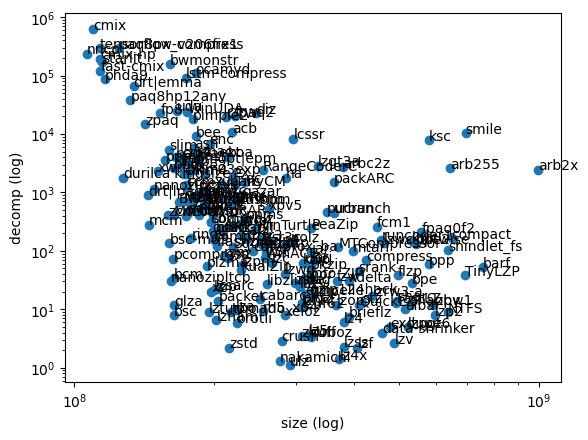

In [21]:
plt.scatter(xs, ys)
for i, name in enumerate(names):
    plt.annotate(name, (xs[i], ys[i]))
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('size (log)')
plt.ylabel('decomp (log)')

plt.show()

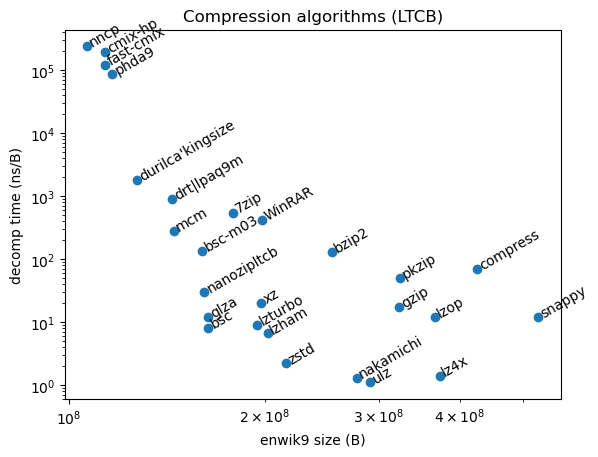

In [22]:
plt.scatter(pxs, pys)
for i, name in enumerate(pnames):
    plt.annotate(name, (pxs[i], pys[i]), rotation=30)
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('enwik9 size (B)')
plt.ylabel('decomp time (ns/B)')
plt.title('Compression algorithms (LTCB)')

plt.show()

In [53]:
[line for line in lines if 'ocamyd' in line]

['ocamyd LTCB 1.0   -s0 -m3                     21,285,121  182,359,986     21,030 x  182,381,016 108960~110000 300 DMC   6\n']

In [55]:
get_substrings(_53[0])

[(0, 6, 'ocamyd'),
 (7, 11, 'LTCB'),
 (12, 15, '1.0'),
 (18, 21, '-s0'),
 (22, 25, '-m3'),
 (46, 56, '21,285,121'),
 (58, 69, '182,359,986'),
 (74, 80, '21,030'),
 (81, 82, 'x'),
 (84, 95, '182,381,016'),
 (96, 109, '108960~110000'),
 (110, 113, '300'),
 (114, 117, 'DMC'),
 (120, 122, '6\n')]